# Machine Learning Model for Predicting “Personnel_needed” size for given Dish.

We will build a regressor that recommends the “Personnel_needed” size for given Dish. This notebook is organized as follows: (1) Data preprocessing and variable selection; (2) Build a machine learning model ; (3) Hyper-parameters tuning;.

## 1. Data preprocessing and variable selection

### 1.1. Read dataset and display columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We read the data set "menu_info.csv" into Dataframe.

In [2]:
df = pd.read_csv("menu_info.csv")

In [3]:
df.head()

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dish_name             158 non-null    object 
 1   Restaurant            158 non-null    object 
 2   Preparation_duration  158 non-null    int64  
 3   Price                 158 non-null    float64
 4   Consumption_duration  158 non-null    float64
 5   Serving_duration      158 non-null    float64
 6   Waiting_duration      158 non-null    float64
 7   Spice_density         158 non-null    float64
 8   Personnel_needed      158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
df.columns

Index(['Dish_name', 'Restaurant', 'Preparation_duration', 'Price',
       'Consumption_duration', 'Serving_duration', 'Waiting_duration',
       'Spice_density', 'Personnel_needed'],
      dtype='object')

We can see that the dataframe has 158 rows and 9 columns, named as follow: 'Dish_name', 'Restaurant', 'Preparation_duration', 'Price','Consumption_duration', 'Serving_duration', 'Waiting_duration','Spice_density', 'Personnel_needed' and we can confirm that there aren't missing values in the data set.

### 1.2. Calculate basic statistics of the data

In [6]:
df.describe()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### 1.3. Variable selection for predicting "Personnel_needed" variable

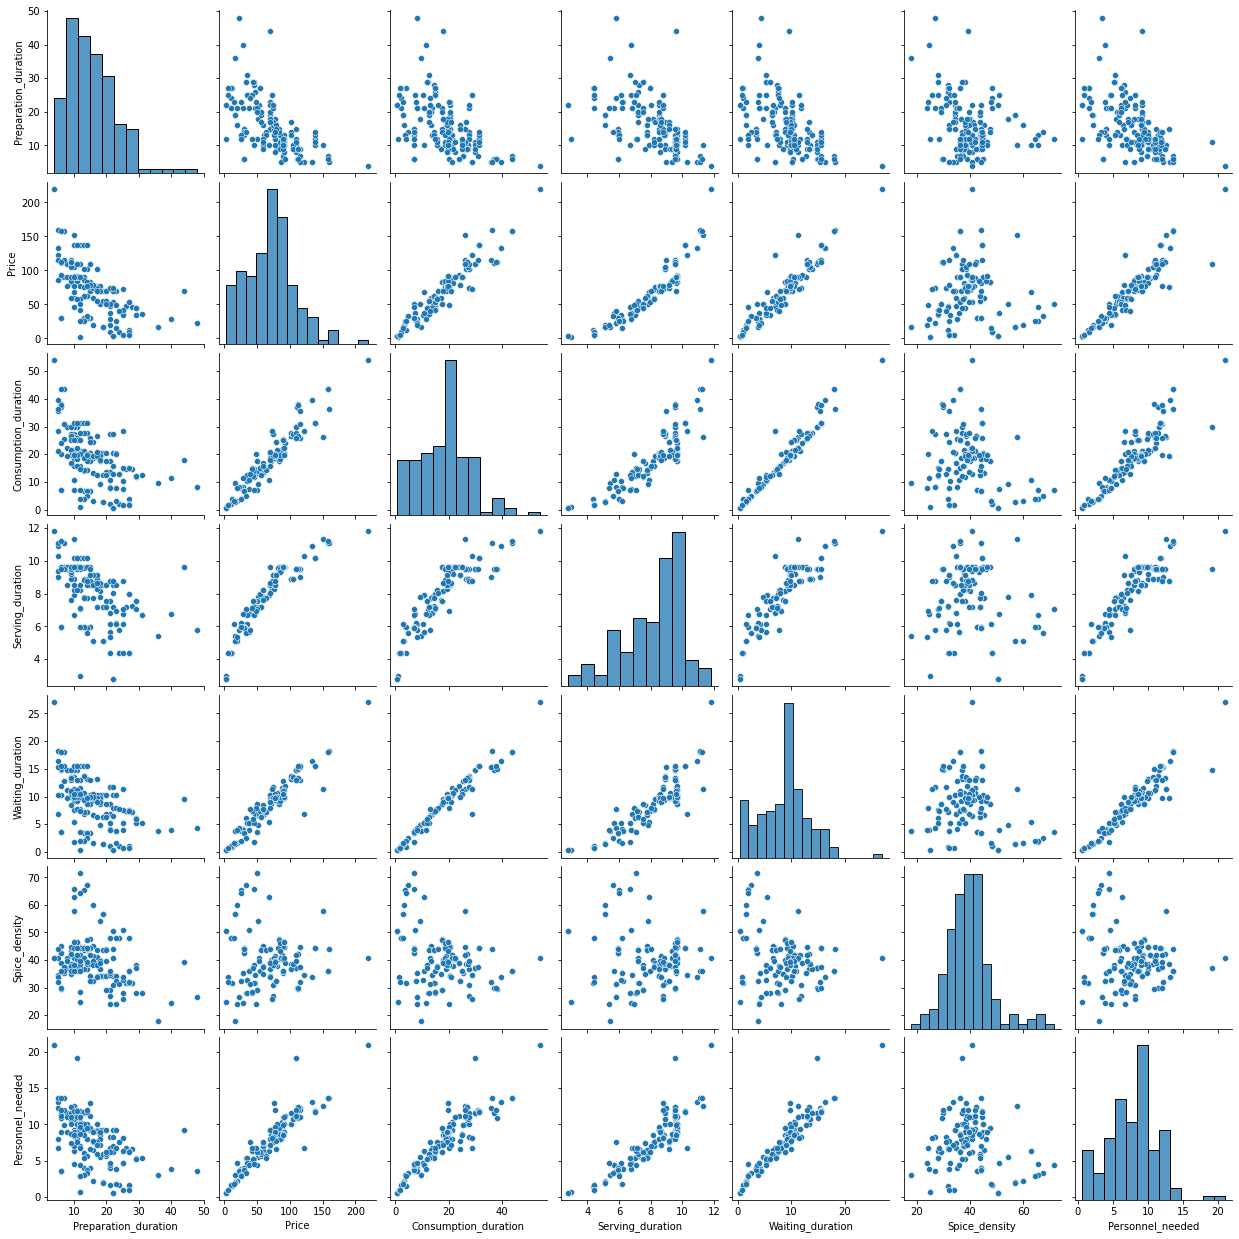

In [7]:
sns.pairplot(df)

From the above pairplot we can see that 'personnel needed' variable  has strong positive correalation with these variables: 'Price', 'Consumption_duration', "Serving_duration' and 'Waiting_duration', and has not that strong negative corelation with 'Preparation_duration' and no correlation between 'Personnel needed' variable and 'Spice_density'.


From the pairplot above, we see that the 'Personnel needed' variable correlates strongly with 4 predictor variables: 'Price', 'Consumption_duration', "Serving_duration' and 'Waiting_duration' and we decide to choose them for our regression model and also to keep the two categorical variables.

In [8]:
df_new = df.drop(['Preparation_duration', 'Spice_density'], axis = 1)

In [9]:
df_new.head()

,Dish_name,Restaurant,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00


### 1.4. One-hot encoding for categorical features

In [10]:
df_nums = df_new.select_dtypes(exclude='object')
df_objs = df_new.select_dtypes(include='object')

In [11]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [12]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [13]:
final_df.head()

,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed,Dish_name_Allegra,Dish_name_Amsterdam,Dish_name_Arcadia,Dish_name_Aries,Dish_name_Armonia,...,Restaurant_Oceania,Restaurant_Orient,Restaurant_P&O,Restaurant_Princess,Restaurant_Regent_Seven_Seas,Restaurant_Royal_Caribbean,Restaurant_Seabourn,Restaurant_Silversea,Restaurant_Star,Restaurant_Windstar
0,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,19.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.5. Create training and testing sets 

In [14]:
X = final_df.drop('Personnel_needed',axis=1)
y = final_df['Personnel_needed']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

The dataset features has a variety of scales and units. For optimal regression performance, we should scale the X features.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 2. Build a machine learning model 

### 2.1. Linear Regression

First we will build Linear Regression Model and we will evaluate its perforamnce.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_reg_model = LinearRegression()

In [22]:
linear_reg_model.fit(scaled_X_train,y_train)

LinearRegression()

In [23]:
print('linear model coeff (w): {}'
     .format(linear_reg_model.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linear_reg_model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linear_reg_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_reg_model.score(scaled_X_test, y_test)))

linear model coeff (w): [ 6.96966619e-01  7.78782442e-01  5.52785346e-01  9.78757855e-01
  1.22441073e-02 -8.06692411e-02 -4.44073424e-02 -1.54696330e-01
 -7.03946789e-03  2.75907404e-02 -2.55223996e-02 -1.42076959e-02
 -7.67565452e-02 -4.11537529e-01 -2.00428389e-03  4.78679461e-02
 -4.66409533e-02  4.34215421e-03  7.96400489e-01 -2.08906296e-02
 -1.06925065e-02 -4.05620465e-01 -2.19231346e-01  1.55274645e-02
  2.32914353e-03 -4.84453355e-01  6.30684590e-02  6.30684590e-02
  6.60861069e-03  3.10325023e-03 -6.15247917e-02  6.31118235e-03
  5.37911142e-03 -9.23328264e-03 -1.17487249e-01 -7.25696705e-05
  6.23072877e-02  6.30684590e-02 -4.12499527e-03 -5.87901219e-02
  4.80675537e-02  1.88707654e-03  1.75969690e-02  2.78006351e-02
 -4.10873928e-01 -1.65049103e-03  1.75496979e-02 -5.06267084e-03
  6.30684590e-02  1.04105397e-02  6.42579722e-02 -5.17204593e-02
  6.56205859e-04 -4.55597186e-01 -6.48202737e-02 -1.61155559e-01
 -4.80468817e-03 -4.58392228e-02  2.78006351e-02  5.63034380e-03
 

When comparing training ste and test set scores, we find that we predict very accurately on the training set, but the R2 score on the test set is much worse. This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we schould try to find a model that allows to control complexity. Next we will try with Ridge Regression (L2 Regularization) and Lasso (L1 Regularization).

### 2.2. Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(scaled_X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(scaled_X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 7.860000000000001
ridge regression linear model coeff:
[ 0.64497153  0.60647609  0.57161087  0.7254622   0.         -0.05135541
 -0.00263163 -0.15045317  0.          0.          0.02706942  0.01820295
 -0.07243723  0.01856808 -0.03373298  0.06317669 -0.02289682  0.
  0.68795432  0.          0.          0.04286654  0.08428289  0.
  0.         -0.15631849  0.04287264  0.04287264  0.          0.
 -0.07297901  0.          0.          0.02117106 -0.11188538  0.
  0.0423965   0.04287264  0.07057778  0.02257418  0.06830285  0.
  0.01947885  0.05298232  0.02062794  0.          0.         -0.03774183
  0.04287264  0.0590022   0.08633107 -0.04090041  0.         -0.04467376
 -0.06052254 -0.1158292  -0.00929431  0.0223051   0.05298232  0.03667388
  0.         -0.05003838  0.          0.         -0.15500151  0.
 -0.09040497 -0.03669661  0.          0.          0.06872029  0.
  0.         -0.07902618  0.03577809 -0.04090041 -0.04957798  0.
  0.37070044  0.   

As we can see the training set score of Ridge is lower then for LinearRegression, while the test set score is higher.
The Ridge model makes a trade-off between the simplicity of the model and its performance on the training set.

### 2.3. Lasso regression

In [25]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(scaled_X_train, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(scaled_X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 7.86
lasso regression linear model coeff:
[ 0.         0.         0.         1.4472935  0.        -0.
  0.        -0.         0.         0.         0.         0.
  0.         0.        -0.         0.        -0.         0.
  0.         0.         0.         0.         0.         0.
  0.        -0.         0.         0.         0.         0.
 -0.         0.         0.         0.        -0.         0.
  0.         0.         0.         0.         0.         0.
 -0.         0.         0.         0.         0.        -0.
  0.         0.         0.        -0.         0.         0.
  0.        -0.         0.         0.         0.        -0.
  0.        -0.         0.         0.        -0.         0.
 -0.        -0.         0.         0.         0.         0.
  0.        -0.         0.        -0.        -0.         0.
  0.         0.         0.        -0.        -0.         0.
  0.        -0.        -0.        -0.         0.         0.
  0.         0.  

We can see that Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 1 of 161 features. Similary to Ridge, Lasoo also has regularization parametar, alpha that controls how strongly coefficients are pushed toward zero.

## 3. Hyper-parameters tuning

### 3.1 Ridge regression with regularization parameter: alpha

In [26]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(scaled_X_train, y_train)
    r2_train = linridge.score(scaled_X_train, y_train)
    r2_test = linridge.score(scaled_X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 2, r-squared training: 1.00, r-squared test: 0.64

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 1.00, r-squared test: 0.84

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 1.00, r-squared test: 0.88

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.99, r-squared test: 0.88

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.97, r-squared test: 0.86

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.94, r-squared test: 0.82

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.51, r-squared test: 0.42



We can see that Ridge Model has best performance with alpha equal to 20.

### 3.3 The Pearson correlation coefficient for the training set and testing datasets

In [28]:
import scipy.stats as stats

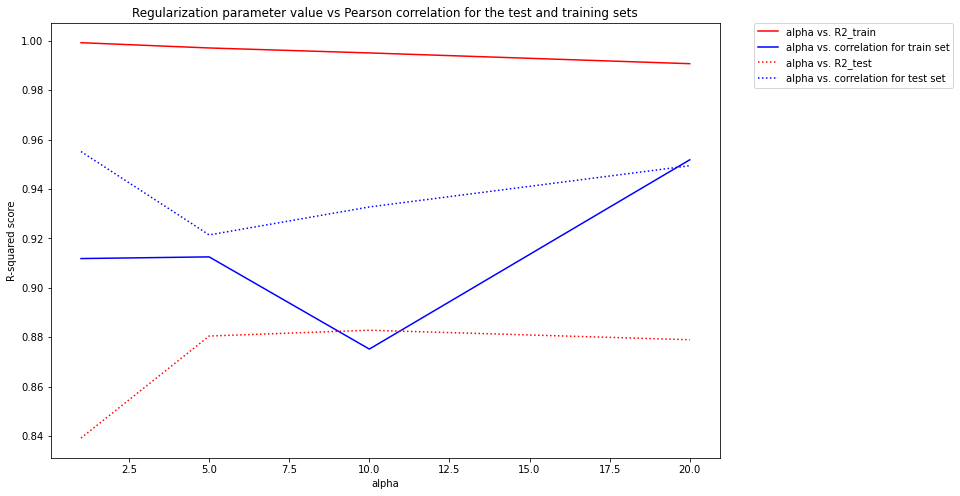

In [50]:
corr_train =[]
corr_test = []

for col in ['Price','Consumption_duration', 'Serving_duration', 'Waiting_duration']:
    corr, pval=stats.pearsonr(X_train[col],y_train)
    corr_train.append(corr)
    corr, pval=stats.pearsonr(X_test[col],y_test)
    corr_test.append(corr)
    
r2_train_Ridge=[]
r2_test_Ridge=[]

alpha = [1, 5, 10, 20]

for this_alpha in alpha:
    linridge = Ridge(alpha = this_alpha).fit(scaled_X_train, y_train)
    r2_train = linridge.score(scaled_X_train, y_train)
    r2_train_Ridge.append(r2_train)
    r2_test = linridge.score(scaled_X_test, y_test)
    r2_test_Ridge.append(r2_test)

plt.figure(figsize=(12,8))

plt.plot(alpha, r2_train_Ridge, c = 'r', ls='-', label = 'alpha vs. R2_train')
plt.plot(alpha, corr_train, c = 'b',ls='-', label = 'alpha vs. correlation for train set')
plt.plot(alpha, r2_test_Ridge, c = 'r', ls='dotted', label = 'alpha vs. R2_test')
plt.plot(alpha, corr_test, c = 'b',ls='dotted', label = 'alpha vs. correlation for test set')
plt.xlabel('alpha')
plt.ylabel('R-squared score')
plt.title('Regularization parameter value vs Pearson correlation for the test and training sets')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    

What is regularization and what is the regularization parameter in your model?

Regularization means explicitly restricting a model to avoid overfitting, that is done when the magnitude of the coeficients is as small as possible. The regularization parametar in our model is alpha.